### AIDI 1002: Lab 2
<b> Machine Learning:  Data Analysis (Before Modelling)</b>

Michael Molnar (100806823)

<b> Problem Statement:</b>
    
This notebook and the accompanying PowerPoint presentation will be a "book report analysis" on data related to the performance of Portuguese students in Math and Portuguese classes.  The goal is to understand the relationships between various factors and how they affect the ultimate grade a student achieves.  Demographic statistics will also be explored to better understand the Portuguese student population.  The statistics were sourced from https://data.worldbank.org/country/PT.

### Data Acquisiton

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the datasets and save each in a dataframe
df_math = pd.read_csv('student-mat.csv', sep=';')
df_por = pd.read_csv('student-por.csv', sep=';')

In [3]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df_math.shape

(395, 33)

The Math DataFrame consists of 395 rows, where each row represents a specific student, and 33 columns, relating to a student's performance in a Math course.

In [5]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
df_por.shape

(649, 33)

The Portuguese DataFrame consists of 649 rows, where each row represents a specific student, and 33 columns, relating to a student's performance in a Portuguese course.

In [7]:
df_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
df_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

<b>The columns have the following descriptions: </b>

school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

sex - student's sex (binary: "F" - female or "M" - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: "U" - urban or "R" - rural)

famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)

Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

guardian - student's guardian (nominal: "mother", "father" or "other")

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

<b>These grades are related with the course subject, Math or Portuguese:</b>

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [9]:
# Check for missing values
df_math.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
df_por.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [11]:
# Check for any duplicate rows
duplicate_rows_math = df_math[df_math.duplicated()]
print(duplicate_rows_math)

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]


In [12]:
duplicate_rows_por = df_por[df_por.duplicated()]
print(duplicate_rows_por)

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]


Each row in the Math and Portuguese datasets is unique and contains no missing values.

### Examining the Worldbank Dataset for Portugual

In [13]:
# Import the external dataset (SOURCE: https://data.worldbank.org/country/PT)
demographics_df = pd.read_csv('API_PRT_DS2_en_csv_v2_1567460.csv', skiprows=4)

In [14]:
# Examining the external dataset
demographics_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Portugal,PRT,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,1.159001,1.374961,0.883068,0.964474,0.639192,0.738687,0.789767,NaN,NaN,NaN
1,Portugal,PRT,"Merchandise exports by the reporting economy, ...",TX.VAL.MRCH.RS.ZS,7.742373,6.306661,5.240247,5.123248,4.272674,3.926338,...,2.847614,2.597198,2.273930,1.871443,1.461879,1.726714,2.167500,NaN,NaN,NaN
2,Portugal,PRT,Food exports (% of merchandise exports),TX.VAL.FOOD.ZS.UN,NaN,NaN,29.054376,26.513996,23.989770,25.559485,...,11.358114,11.560764,12.221271,12.251025,12.416097,12.142607,11.897589,11.849699,NaN,NaN
3,Portugal,PRT,Merchandise imports from low- and middle-incom...,TM.VAL.MRCH.R4.ZS,6.338850,5.968630,6.501816,6.408669,4.061181,4.741707,...,3.115886,1.781406,1.915747,1.660651,1.398502,1.291271,1.214756,NaN,NaN,NaN
4,Portugal,PRT,"Tariff rate, most favored nation, weighted mea...",TM.TAX.TCOM.WM.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.070000,2.350000,2.290000,2.520000,3.180000,3.070000,2.650000,NaN,NaN,NaN


In [15]:
demographics_df.shape

(1440, 66)

This dataset consists of 1,440 rows, where each row represents a certain indicator for the country of Portugual.  The columns show all data that is available between 1960 and 2020, made available by World Bank.  Several of these rows will be used to provide background to the anlysis that follows.

In [16]:
# Drop unncecessary columns
demographics_df.drop(columns=['Country Name', 'Country Code', 'Indicator Code'], inplace=True)

### Analyzing the Target (G3)

G3 is the final grade a student receives.  It is on a scale from 0 to 20.

Text(0, 0.5, 'Count')

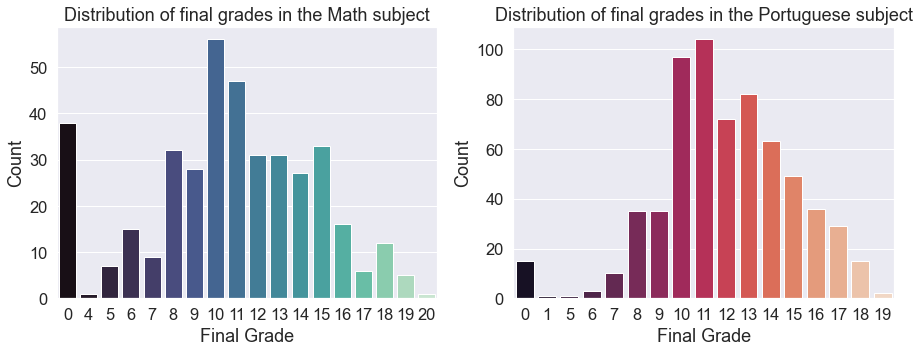

In [21]:
# Plot the distribution of final grades in the two subjects
f= plt.figure(figsize=(15, 5))


ax=f.add_subplot(121)
ax = sns.countplot(x="G3", data=df_math, palette='mako')
ax.set_title('Distribution of final grades in the Math subject')
ax.set_xlabel('Final Grade')
ax.set_ylabel('Count')


ax2=f.add_subplot(122)
ax2 = sns.countplot(x="G3", data=df_por, palette='rocket')
ax2.set_title('Distribution of final grades in the Portuguese subject')
ax2.set_xlabel('Final Grade')
ax2.set_ylabel('Count')

In [18]:
# Get summary statistics
df_math['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [19]:
# Get summary statistics
df_por['G3'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

<b> Observations:</b>
- On average students received a higher grade in Portuguese: 11.9 versus 10.4 in math 
- The highest math grade was 20, but the highest Portuguese grade was 19 
- There were students who recieved a final grade of 0 in both classes.
- The final grades in both subjects are normally distributed with a higher than expected number of students receiving a score of 0. 

Plotting the final grades of the two classes as a density plot on the same axis:

Text(0, 0.5, 'Density')

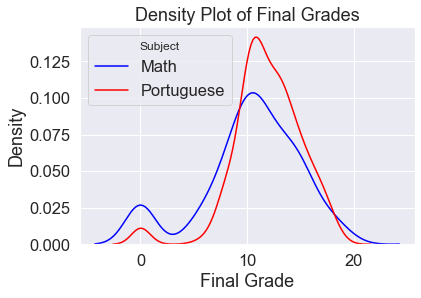

In [22]:
fig, ax = plt.subplots()
sns.distplot(df_math['G3'], hist = False, label = 'Math', ax=ax, color='blue')
sns.distplot(df_por['G3'], hist = False, label = 'Portuguese', ax=ax, color='red')
plt.legend(title = 'Subject')
plt.title('Density Plot of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Density')

<b> Observations:</b>
- We see that more students recevie lower grades in math than in Portuguese, and more students received grades in the range of 10-17 in Portuguese 

Prepare Sweetviz reports for the two datasets.

In [17]:
import sweetviz as sv
math_report = sv.analyze(df_math)

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [18]:
por_report = sv.analyze(df_por)

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [19]:
math_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [20]:
por_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


### Explore Correlations Between Numeric Variables

In [21]:
# First, for math
df_math.corr().style.background_gradient(cmap='Blues')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


<b> Observations:</b>
- The factors that are most correlated with final grade are G1 (first period grade) and G2 (second period grade).
- Age is somewhat correlated with the number of failures and absences a student has.  This will be explored, but a hypothesis may be that older students are more likely to work in their free time, and thus spend less time on homwork and studies.
- The education of the mother and father show correlation with the student's grades.
- As would be expected, the number of failures a student has is strongly correlated with the grades they achieve.
- Some factors which I would have expected would impact on grades - drinking alcohol and current health - do not seem very correlated with a student's marks.
- Other factors that are related to each other show correlation with each other - going out, having free time, drinking alcohol.

In [22]:
# Next, for Portuguese
df_por.corr().style.background_gradient(cmap='Reds')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


<b> Observations:</b>
- All of the correlations seen in the math data exist here as well. 
- What is interesting is that the time spent studying is a lot more correlated to the Portuguese grades than the math grades. 

The best predictor of a student's final grade is his or her first and second period grades.  As a start we can look at the evolution of students' grades across the three periods.

Text(0, 0.5, 'Final Math Grade')

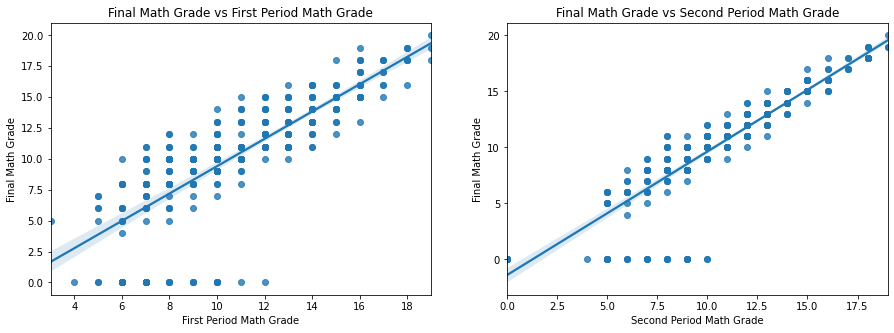

In [23]:
# Math Regression Plot
f= plt.figure(figsize=(15, 5))

ax=f.add_subplot(121)
ax = sns.regplot(x = df_math['G1'], y= df_math['G3'])
ax.set_title('Final Math Grade vs First Period Math Grade')
ax.set_xlabel('First Period Math Grade')
ax.set_ylabel('Final Math Grade')

ax2=f.add_subplot(122)
ax2 = sns.regplot(x=df_math['G2'], y=df_math['G3'])
ax2.set_title('Final Math Grade vs Second Period Math Grade')
ax2.set_xlabel('Second Period Math Grade')
ax2.set_ylabel('Final Math Grade')

Text(0, 0.5, 'Final Portuguese Grade')

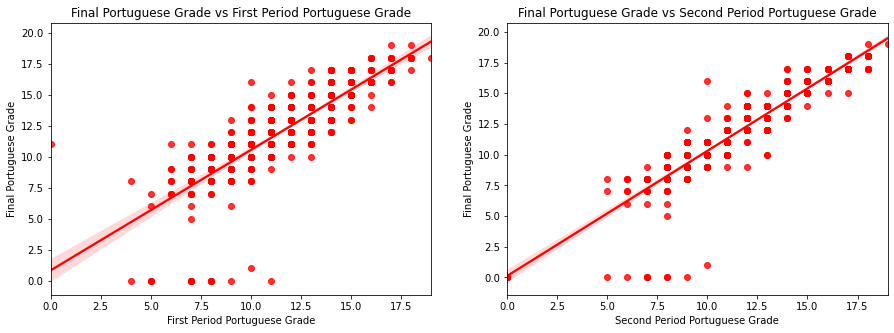

In [24]:
# Portuguese Regression Plot
f= plt.figure(figsize=(15, 5))

ax=f.add_subplot(121)
ax = sns.regplot(x = df_por['G1'], y= df_por['G3'], color='r')
ax.set_title('Final Portuguese Grade vs First Period Portuguese Grade')
ax.set_xlabel('First Period Portuguese Grade')
ax.set_ylabel('Final Portuguese Grade')

ax2=f.add_subplot(122)
ax2 = sns.regplot(x=df_por['G2'], y=df_por['G3'], color='r')
ax2.set_title('Final Portuguese Grade vs Second Period Portuguese Grade')
ax2.set_xlabel('Second Period Portuguese Grade')
ax2.set_ylabel('Final Portuguese Grade')

All four plots show a strong linear relationship - the higher the first or second period grade, the higher the final grade generally.  For both subjects there were students who had low or even middling grades after the first and second periods who went on to receive a final grade of zero.  It would seem that perhaps these students dropped out of school for whatever reason. 

### Examining Specific Features

### Final Grades by School

This analysis consists of examining the students in secondary education at two Portuguese schools.  Before going into the data, we can look at the state of secondary education in Portugual.  The following plot depicts the percentage of the government's educational spending that goes to secondary eduation.

Text(0, 0.5, '% of Government Education Expenditure')

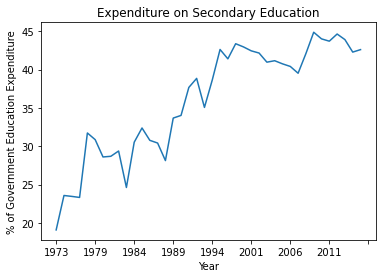

In [25]:
a = demographics_df.iloc[790]
a = a.drop('Indicator Name')
a = a.dropna()
ax = a.plot(title='Expenditure on Secondary Education')
ax.set_xlabel('Year')
ax.set_ylabel('% of Government Education Expenditure')

We see that the Portuguese government, broadly speaking, is increasing the proportion of its education resources that it spends on secondary education - most recently at over 40%.  This would indicate that the secondary students we are exmaining in this report are in a relatively good position to succeed, in terms of the resources and funding the government provides for their education.

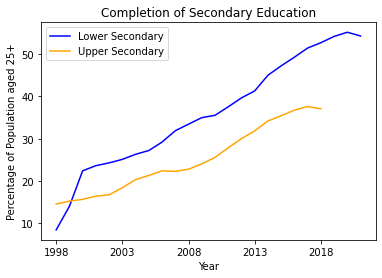

In [26]:
a = demographics_df.iloc[1126]
a = a.drop('Indicator Name')
a = a.dropna()
ax = a.plot(color='blue', label='Lower Secondary')
b = demographics_df.iloc[731]
b = b.drop('Indicator Name')
b = b.dropna()
ax2 = b.plot(color='orange', label='Upper Secondary')

plt.xlabel('Year')
plt.ylabel('Percentage of Population aged 25+')
plt.title('Completion of Secondary Education')
plt.legend()
plt.show()

The successful completition of secondary education in Portugal has becoming increasingly common in Portugual.  Over 50% of people over the age of 25 have successfull completed lower secondary education.  The percentage that have completed upper secondary is lower, but is increasing as well.

In [27]:
# For the visualization, change the school values to display the school's name in full
df_math['school2'] = df_math['school'].map({'GP':'Gabriel Pereira', 'MS':'Mousinho de Silveira'})

Text(0, 0.5, 'Final Grade')

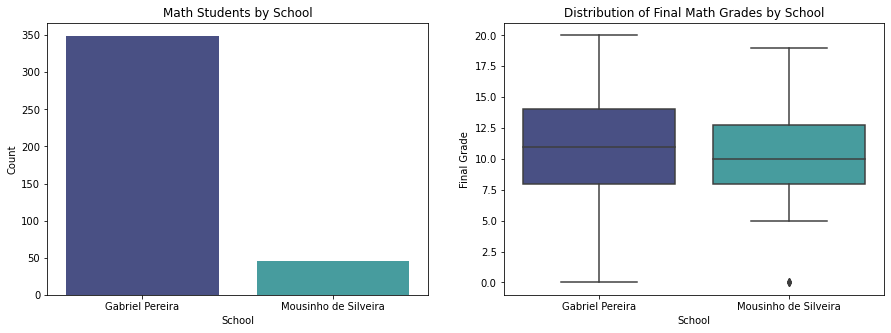

In [28]:
# For math, plot a count plot of the total number of students at each scool
# Also plot a bar plot to show the distribution of math grades
f = plt.figure(figsize=(15,5))

ax = f.add_subplot(121)
ax = sns.countplot(x='school2', data=df_math, palette='mako')
ax.set_title('Math Students by School')
ax.set_xlabel('School')
ax.set_ylabel('Count')
ax2 = f.add_subplot(122)
ax2 = sns.boxplot(x='school2', y='G3', data=df_math, palette='mako')
ax2.set_title('Distribution of Final Math Grades by School')
ax2.set_xlabel('School')
ax2.set_ylabel('Final Grade')

The distributions are somewhat similar, although students at Gabriel Pereira perform slightly better in math overall.  Gabriel Pereira has many more math students than does Mousinho de Silveira.

In [29]:
# Next, do the same for the Portuguese subject
df_por['school2'] = df_por['school'].map({'GP':'Gabriel Pereira', 'MS':'Mousinho de Silveira'})

Text(0, 0.5, 'Final Grade')

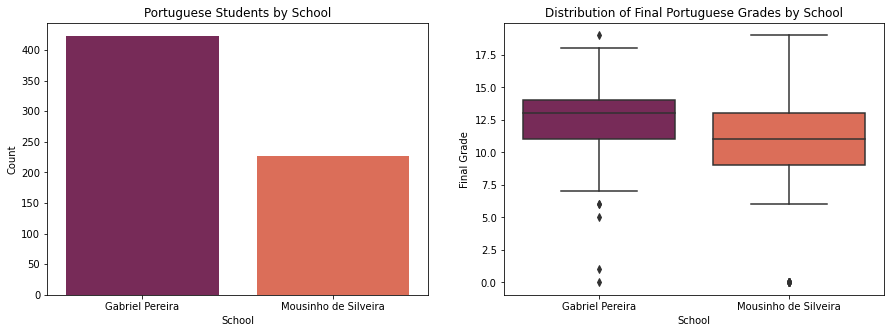

In [30]:
f = plt.figure(figsize=(15,5))

ax = f.add_subplot(121)
ax = sns.countplot(x='school2', data=df_por, palette='rocket')
ax.set_title('Portuguese Students by School')
ax.set_xlabel('School')
ax.set_ylabel('Count')
ax2 = f.add_subplot(122)
ax2 = sns.boxplot(x='school2', y='G3', data=df_por, palette='rocket')
ax2.set_title('Distribution of Final Portuguese Grades by School')
ax2.set_xlabel('School')
ax2.set_ylabel('Final Grade')

Here we see that students at Gabriel Pereira achieve noticeably higher final grades in Portuguese than do the students at Mousinho de Silveira.

### Final Grades by Sex

In [31]:
df_math['sex2'] = df_math['sex'].map({'F':'Female', 'M':'Male'})

Text(0, 0.5, 'Final Grade')

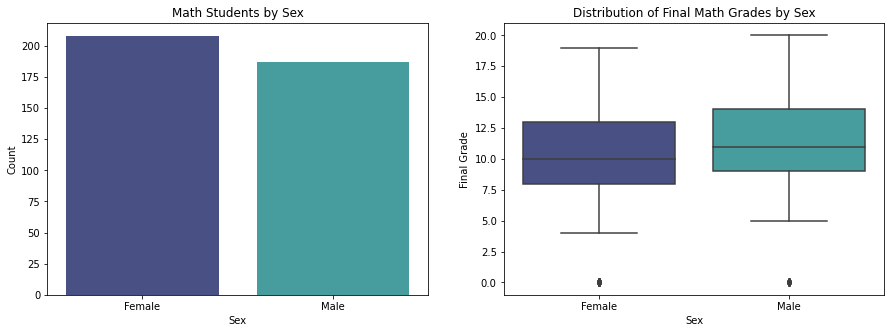

In [32]:
# Looking at both schools at the same time, plot the number of students by sex, and the distribution of final grades by sex
f = plt.figure(figsize=(15,5))

ax = f.add_subplot(121)
ax = sns.countplot(x='sex2', data=df_math, palette='mako')
ax.set_title('Math Students by Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax2 = f.add_subplot(122)
ax2 = sns.boxplot(x='sex2', y='G3', data=df_math, palette='mako')
ax2.set_title('Distribution of Final Math Grades by Sex')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Final Grade')

The student population is roughly split by sex, and males achieve slightly higher final math grades than do females.

In [33]:
df_por['sex2'] = df_por['sex'].map({'F':'Female', 'M':'Male'})

Text(0, 0.5, 'Final Grade')

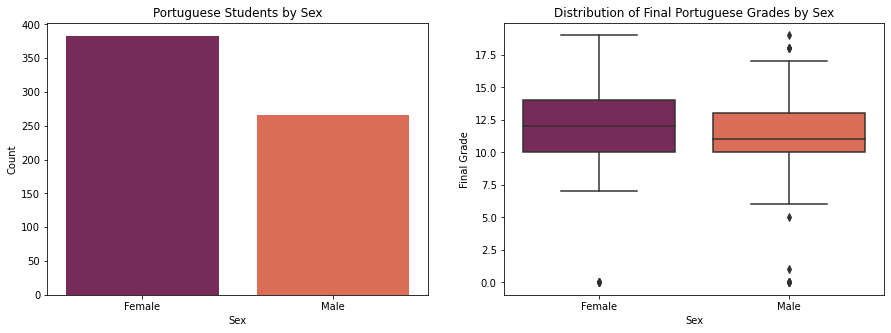

In [34]:
f = plt.figure(figsize=(15,5))

ax = f.add_subplot(121)
ax = sns.countplot(x='sex2', data=df_por, palette='rocket')
ax.set_title('Portuguese Students by Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax2 = f.add_subplot(122)
ax2 = sns.boxplot(x='sex2', y='G3', data=df_por, palette='rocket')
ax2.set_title('Distribution of Final Portuguese Grades by Sex')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Final Grade')

There are significantly more females than males in the Portuguese classes, and females achieve slightly better final grades than males, on average.

### Final Grade by Age

Text(0.5, 1.0, 'Distribution of Final Math Grades by Age')

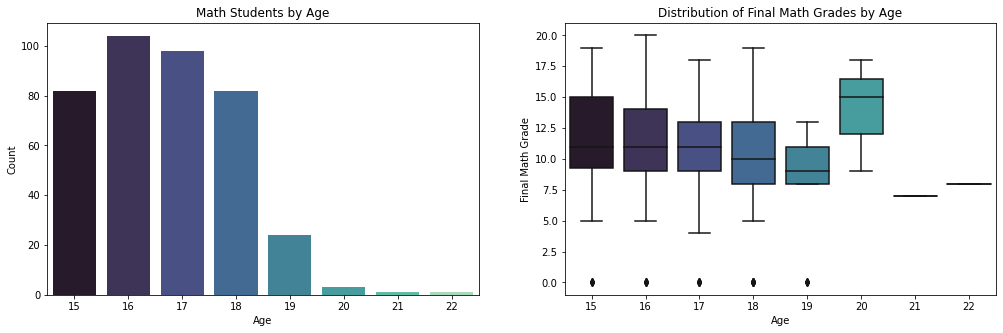

In [35]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax = sns.countplot(x='age', data=df_math, palette='mako')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Math Students by Age')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='age', y='G3', data=df_math, palette='mako')
ax2.set_xlabel('Age')
ax2.set_ylabel('Final Math Grade')
ax2.set_title('Distribution of Final Math Grades by Age')

The math grades decrease as a student ages from 15 to 19, but then is the highest when a student is 20.  We can see from the count plot that very few students are aged 20 and above, compared with the ages 15 to 18.  

Text(0.5, 1.0, 'Distribution of Final Portuguese Grades by Age')

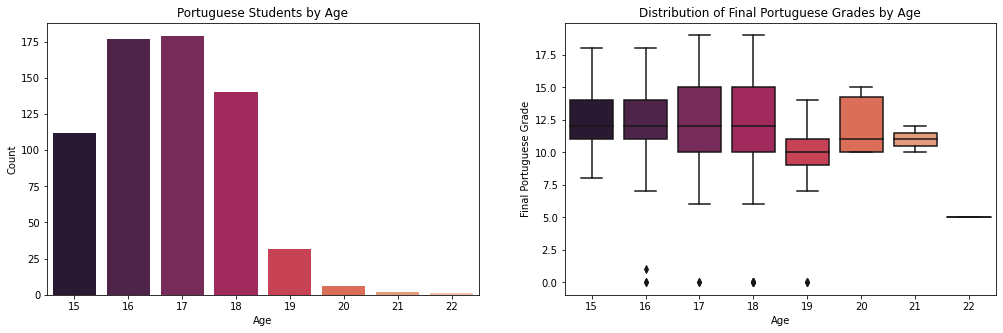

In [36]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax = sns.countplot(x='age', data=df_por, palette='rocket')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Portuguese Students by Age')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='age', y='G3', data=df_por, palette='rocket')
ax2.set_xlabel('Age')
ax2.set_ylabel('Final Portuguese Grade')
ax2.set_title('Distribution of Final Portuguese Grades by Age')

Again we see that the majority of students are ages 15 to 18, but here we see very consistent grades across the different ages.  Only 19 year olds perform slightly lower than all of the other ages.

### Final Grade by the Number of Failures

In [37]:
df_math['failures2'] = df_math['failures'].map({0:0, 1:1, 2:2, 3:'3 or more'})

Text(0.5, 1.0, 'Distribution of Final Math Grades by Number of Failures')

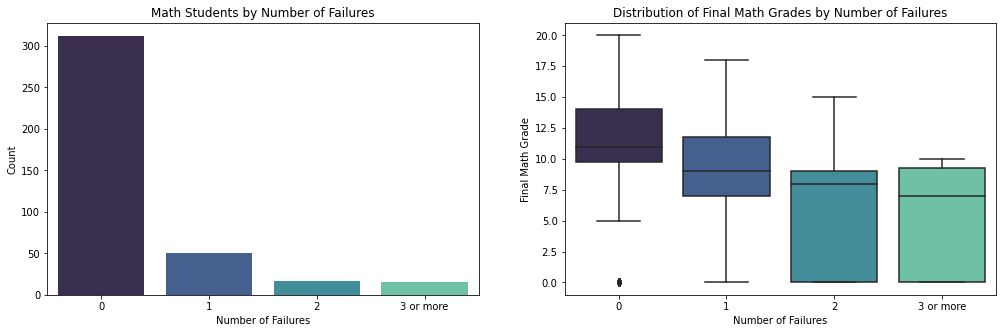

In [38]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax = sns.countplot(x='failures2', data=df_math, palette='mako', order=df_math['failures2'].value_counts().index)
ax.set_xlabel('Number of Failures')
ax.set_ylabel('Count')
ax.set_title('Math Students by Number of Failures')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='failures2', y='G3', data=df_math, palette='mako', order=df_math['failures2'].value_counts().index)
ax2.set_xlabel('Number of Failures')
ax2.set_ylabel('Final Math Grade')
ax2.set_title('Distribution of Final Math Grades by Number of Failures')

The vast majority of students have not failed a class.  As would be expected, as the number of times a student has a failed a class increases, their final grade in math decreases.

In [39]:
df_por['failures2'] = df_por['failures'].map({0:0, 1:1, 2:2, 3:'3 or more'})

Text(0.5, 1.0, 'Distribution of Final Portuguese Grades by Number of Failures')

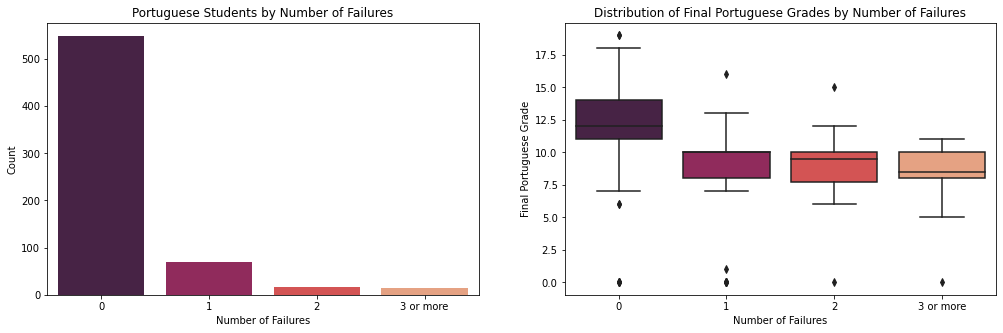

In [40]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax = sns.countplot(x='failures2', data=df_por, palette='rocket', order=df_por['failures2'].value_counts().index)
ax.set_xlabel('Number of Failures')
ax.set_ylabel('Count')
ax.set_title('Portuguese Students by Number of Failures')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='failures2', y='G3', data=df_por, palette='rocket', order=df_por['failures2'].value_counts().index)
ax2.set_xlabel('Number of Failures')
ax2.set_ylabel('Final Portuguese Grade')
ax2.set_title('Distribution of Final Portuguese Grades by Number of Failures')

As with the math students, the vast majority of students have not failed a class.  Again, students who have never failed a class achieve the highest final grades in Portuguese, as they do in math.

### Final Grade by Address

This section will explore the imapct of a students' home address - urban or rural - on their final grades.  To give some context, we can observe the following two plots.

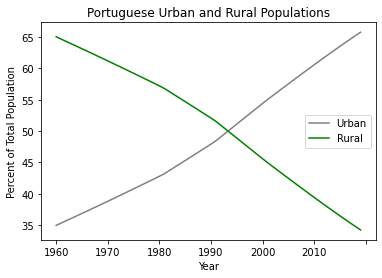

In [41]:
a = demographics_df.iloc[189]
a = a.drop('Indicator Name')
a = a.dropna()
ax = a.plot(color='grey', label='Urban')
b = demographics_df.iloc[1302]
b = b.drop('Indicator Name')
b = b.dropna()
ax2 = b.plot(color='green', label='Rural')

plt.xlabel('Year')
plt.ylabel('Percent of Total Population')
plt.title('Portuguese Urban and Rural Populations')
plt.legend()
plt.show()

We see that since 1960 the percentage of people living in urban areas has been steading increasing, while the percentage of people living in rural areas has been steadily decreasing.  We can now explore the home address of students in our data study.

In [42]:
df_math['address2'] = df_math['address'].map({'U': 'Urban', 'R': 'Rural'})

Text(0.5, 1.0, 'Distribution of Final Math Grades by Home Address')

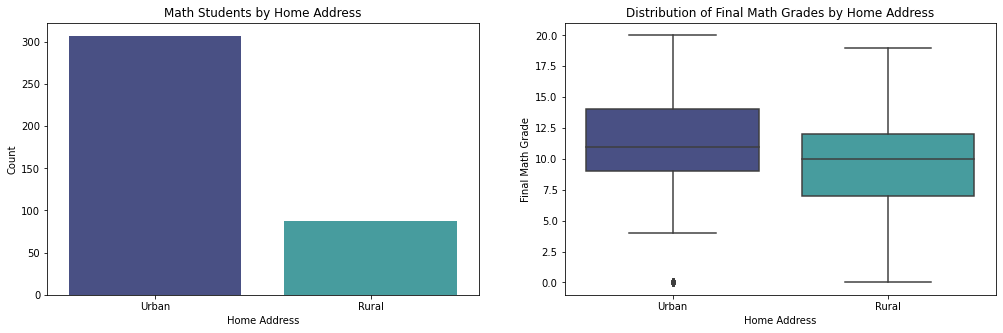

In [43]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='address2', data=df_math, palette='mako')
ax.set_xlabel('Home Address')
ax.set_ylabel('Count')
ax.set_title('Math Students by Home Address')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='address2', y='G3', data=df_math, palette='mako')
ax2.set_xlabel('Home Address')
ax2.set_ylabel('Final Math Grade')
ax2.set_title('Distribution of Final Math Grades by Home Address')

Many more students live in urban areas than rural.  These students perform better than those who live in rural areas.  This seems logical - urban addresses are likely closer to schools and resources such as libraries, and also provide better access to services such as restaurants, doctors, and shopping. 

In [44]:
df_por['address2'] = df_por['address'].map({'U': 'Urban', 'R': 'Rural'})

Text(0.5, 1.0, 'Distribution of Final Portuguese Grades by Home Address')

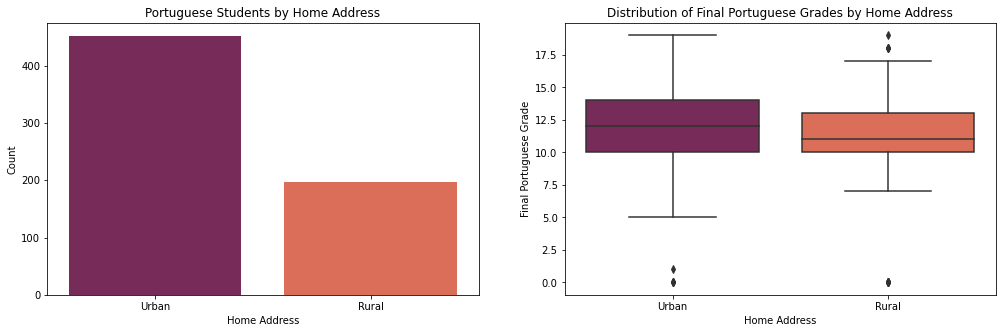

In [45]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='address2', data=df_por, palette='rocket')
ax.set_xlabel('Home Address')
ax.set_ylabel('Count')
ax.set_title('Portuguese Students by Home Address')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='address2', y='G3', data=df_por, palette='rocket')
ax2.set_xlabel('Home Address')
ax2.set_ylabel('Final Portuguese Grade')
ax2.set_title('Distribution of Final Portuguese Grades by Home Address')

The same observations are noted as with the math students, although the grades in Portuguese are much closer for urban and rural students than the math grades were.

### Final Grade by Mother's Education

In [46]:
df_math['Medu2'] = df_math['Medu'].map({0: 'None', 1: 'Primary', 2: '5th to 9th Grade', 3: 'Secondary', 4: 'Higher'})

Text(0.5, 1.0, "Distribution of Final Math Grades by Mother's Education")

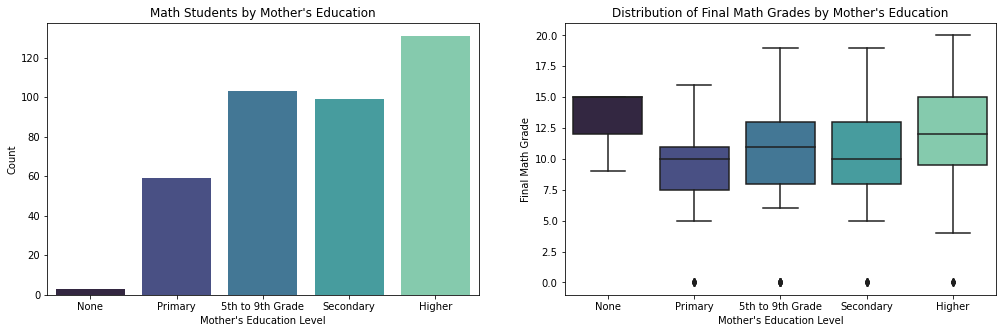

In [47]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='Medu2', data=df_math, palette='mako', order=['None', 'Primary', '5th to 9th Grade', 'Secondary', 'Higher'])
ax.set_xlabel("Mother's Education Level")
ax.set_ylabel('Count')
ax.set_title("Math Students by Mother's Education")

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='Medu2', y='G3', data=df_math, palette='mako', order=['None', 'Primary', '5th to 9th Grade', 'Secondary', 'Higher'])
ax2.set_xlabel("Mother's Education Level")
ax2.set_ylabel('Final Math Grade')
ax2.set_title("Distribution of Final Math Grades by Mother's Education")

We see that the majority of the students's mothers are educated at least to the 5th to 9th grade level.  The most frequent level of education is higher than secondary school.  Only a very small number of students have mothers who have no education, but these students obtain the highest average final grades.  Other than that, the students' math grades increase as the level of their mother's education increases.  This variable seems to be a good predictor of a student's final math grades.

In [48]:
df_por['Medu2'] = df_por['Medu'].map({0: 'None', 1: 'Primary', 2: '5th to 9th Grade', 3: 'Secondary', 4: 'Higher'})

Text(0.5, 1.0, "Distribution of Final Portuguese Grades by Mother's Education")

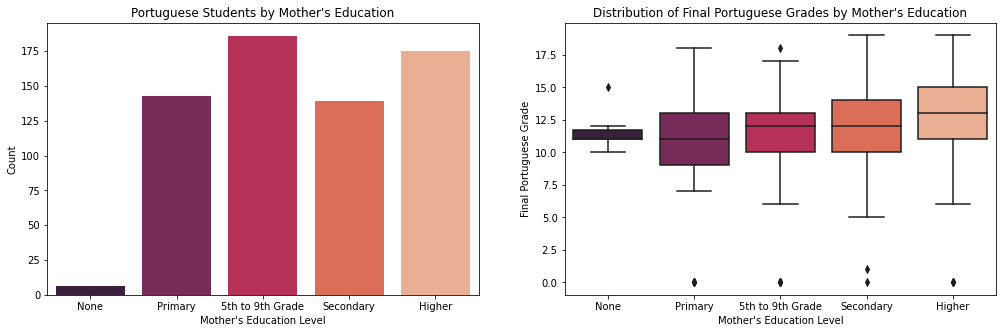

In [49]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='Medu2', data=df_por, palette='rocket', order=['None', 'Primary', '5th to 9th Grade', 'Secondary', 'Higher'])
ax.set_xlabel("Mother's Education Level")
ax.set_ylabel('Count')
ax.set_title("Portuguese Students by Mother's Education")

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='Medu2', y='G3', data=df_por, palette='rocket', order=['None', 'Primary', '5th to 9th Grade', 'Secondary', 'Higher'])
ax2.set_xlabel("Mother's Education Level")
ax2.set_ylabel('Final Portuguese Grade')
ax2.set_title("Distribution of Final Portuguese Grades by Mother's Education")

As opposed to the mothers of the math students, the distribution of the mother's education for the Portuguese students is slightly different - primary education only surpases a secondary education, while 5th to 9th grade is the most common.  Again, the students' grades increase as their mother's education increases. 

### Final Grade by Father's Education

In [50]:
df_math['Fedu2'] = df_math['Fedu'].map({0: 'None', 1: 'Primary', 2: '5th to 9th Grade', 3: 'Secondary', 4: 'Higher'})

Text(0.5, 1.0, "Distribution of Final Math Grades by Father's Education")

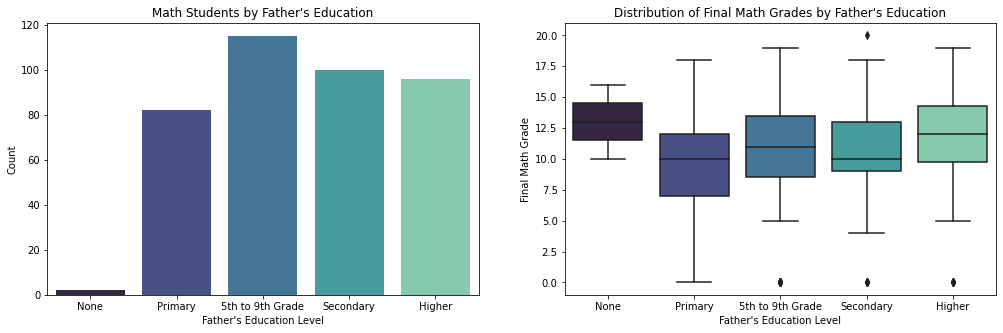

In [51]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='Fedu2', data=df_math, palette='mako', order=['None', 'Primary', '5th to 9th Grade', 'Secondary', 'Higher'])
ax.set_xlabel("Father's Education Level")
ax.set_ylabel('Count')
ax.set_title("Math Students by Father's Education")

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='Fedu2', y='G3', data=df_math, palette='mako', order=['None', 'Primary', '5th to 9th Grade', 'Secondary', 'Higher'])
ax2.set_xlabel("Father's Education Level")
ax2.set_ylabel('Final Math Grade')
ax2.set_title("Distribution of Final Math Grades by Father's Education")

Again we have a tiny sample of students whose fathers have no education, and these students have the highest math grades.  After these, the students' grades increase as their fathers' education level increases.

In [52]:
df_por['Fedu2'] = df_por['Fedu'].map({0: 'None', 1: 'Primary', 2: '5th to 9th Grade', 3: 'Secondary', 4: 'Higher'})

Text(0.5, 1.0, "Distribution of Final Portuguese Grades by Father's Education")

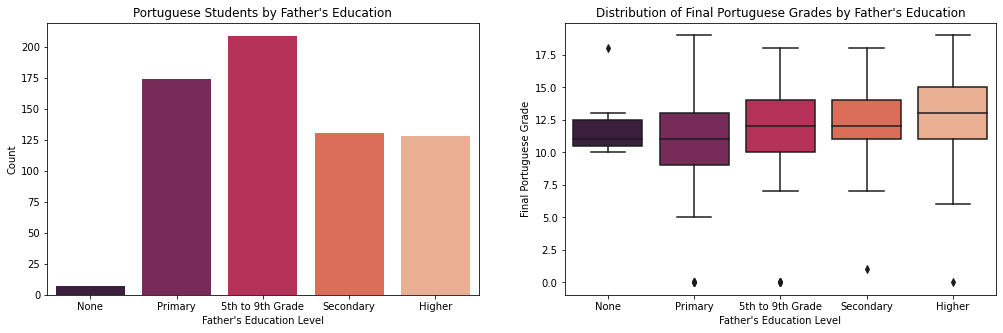

In [53]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='Fedu2', data=df_por, palette='rocket', order=['None', 'Primary', '5th to 9th Grade', 'Secondary', 'Higher'])
ax.set_xlabel("Father's Education Level")
ax.set_ylabel('Count')
ax.set_title("Portuguese Students by Father's Education")

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='Fedu2', y='G3', data=df_por, palette='rocket', order=['None', 'Primary', '5th to 9th Grade', 'Secondary', 'Higher'])
ax2.set_xlabel("Father's Education Level")
ax2.set_ylabel('Final Portuguese Grade')
ax2.set_title("Distribution of Final Portuguese Grades by Father's Education")

This follows the same distribution as the fathers of the math students.  5th to 9th grade is the most common education level, and the Portuguese final grades of the students tend to increase as the father's education increases. 

<b> Some observations so far:</b>
- As noted in the correlation section of this analysis, the education levels of the mothers and fathers seems to be a good indicator of a student's final grades.
- Similarly, the number of classes a student has failed has a strong correlation with the grades they achieve.
- Males tend to perform better in math while females tend perform better in Portuguese. 
- Math marks tend to decrease as the student gets older, while Portuguese grades stay generally consistent. 

### Final Grade by if the Student has Taken Additional Paid Classes

Text(0.5, 1.0, 'Distribution of Final Math Grades by if they have Taken Paid Classes')

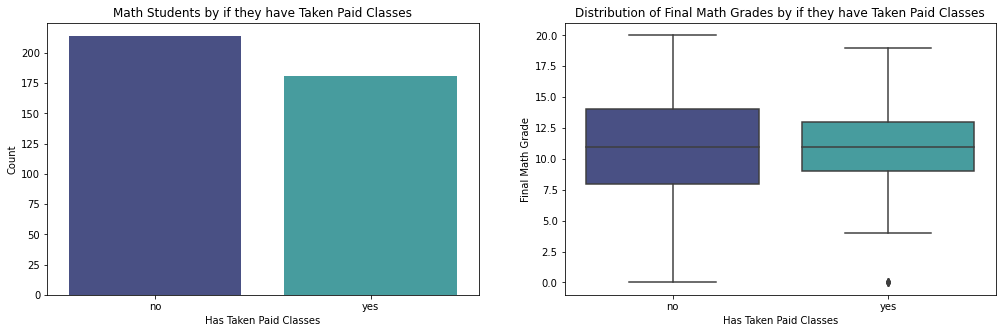

In [54]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='paid', data=df_math, palette='mako')
ax.set_xlabel('Has Taken Paid Classes')
ax.set_ylabel('Count')
ax.set_title('Math Students by if they have Taken Paid Classes')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='paid', y='G3', data=df_math, palette='mako')
ax2.set_xlabel('Has Taken Paid Classes')
ax2.set_ylabel('Final Math Grade')
ax2.set_title('Distribution of Final Math Grades by if they have Taken Paid Classes')

A lot of math students have taken additional paid classes, and the math grades have less variance than those of the students that have not, but the average grades are no higher.  This is somewhat surprising.

Text(0.5, 1.0, 'Distribution of Final Portuguese Grades by if they have Taken Paid Classes')

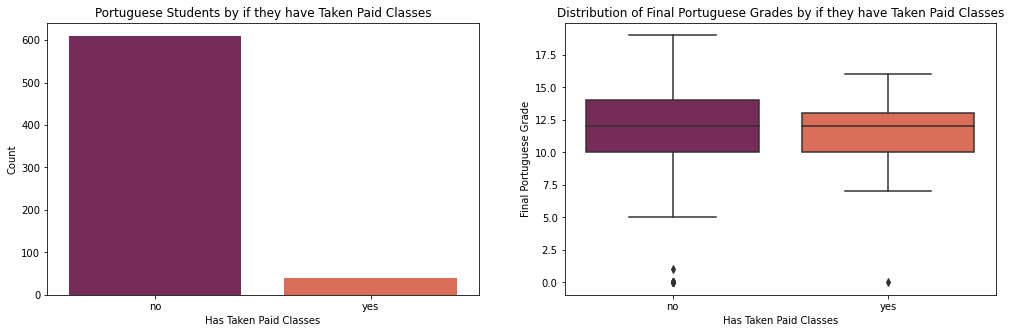

In [55]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='paid', data=df_por, palette='rocket')
ax.set_xlabel('Has Taken Paid Classes')
ax.set_ylabel('Count')
ax.set_title('Portuguese Students by if they have Taken Paid Classes')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='paid', y='G3', data=df_por, palette='rocket')
ax2.set_xlabel('Has Taken Paid Classes')
ax2.set_ylabel('Final Portuguese Grade')
ax2.set_title('Distribution of Final Portuguese Grades by if they have Taken Paid Classes')

Very few students have taken paid classes in Portuguese, and again these courses do not seem to benefit the student's final grade in the subject.

### Final Grades by if the Student Wants to Take Higher Education

The desire to pursue post-secondary education would seem to be a motivation for a student to do well in their secondary education.  We can first look at the popularity of post-secondary education in Portugal, to understand if it is accessible and would be a goal for younger students.

Text(0, 0.5, 'Percentage of Population')

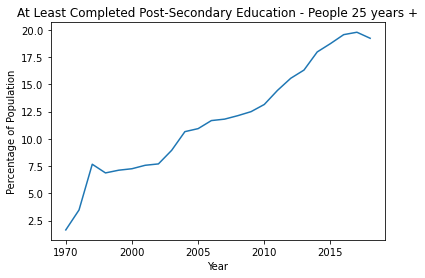

In [56]:
a = demographics_df.iloc[431]
a = a.drop('Indicator Name')
a = a.dropna()
ax = a.plot(title='At Least Completed Post-Secondary Education - People 25 years +')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Population')

We see that the percentage of Portuguese people over 25 years of age that have completed post-secondary education has been on the rise - up to nearly 20%.  So more and more people are pursuing post-secondary education in Portugual, which would seem to indicate that the desire to do so would be a motivating factor for younger students to do well.

Text(0.5, 1.0, 'Distribution of Final Math Grades by if they Want to Take Higher Education')

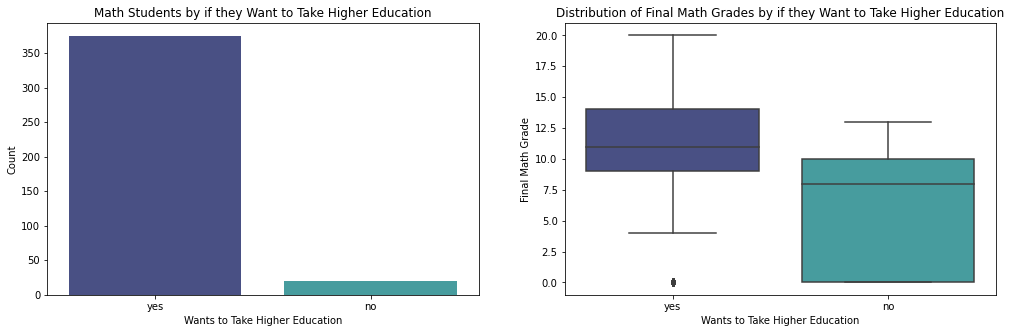

In [57]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='higher', data=df_math, palette='mako')
ax.set_xlabel('Wants to Take Higher Education')
ax.set_ylabel('Count')
ax.set_title('Math Students by if they Want to Take Higher Education')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='higher', y='G3', data=df_math, palette='mako')
ax2.set_xlabel('Wants to Take Higher Education')
ax2.set_ylabel('Final Math Grade')
ax2.set_title('Distribution of Final Math Grades by if they Want to Take Higher Education')

The vast majority of math students wish to take higher education, and these students achive higher grades than the students who do not. 

Text(0.5, 1.0, 'Distribution of Final Portuguese Grades by if they Want to Take Higher Education')

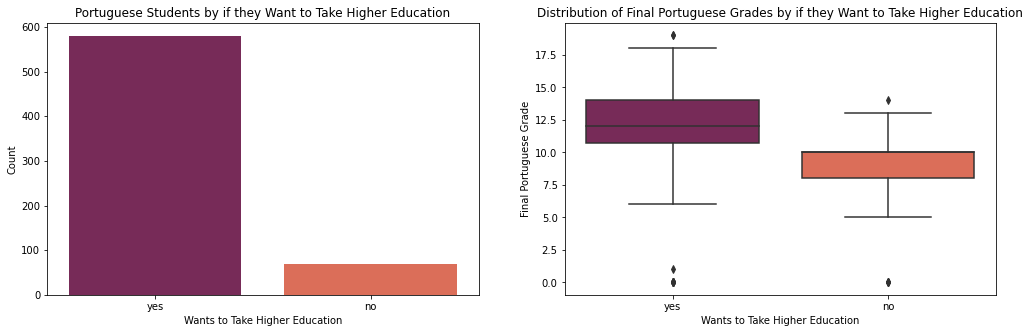

In [58]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='higher', data=df_por, palette='rocket')
ax.set_xlabel('Wants to Take Higher Education')
ax.set_ylabel('Count')
ax.set_title('Portuguese Students by if they Want to Take Higher Education')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='higher', y='G3', data=df_por, palette='rocket')
ax2.set_xlabel('Wants to Take Higher Education')
ax2.set_ylabel('Final Portuguese Grade')
ax2.set_title('Distribution of Final Portuguese Grades by if they Want to Take Higher Education')

The same is true for the Portuguese subject - most students want to take higher education and achieve higher grades. 

### Final Grades by if the Student has Extra Educational Support

Text(0.5, 1.0, 'Distribution of Final Math Grades by if they Have Extra Educational Support')

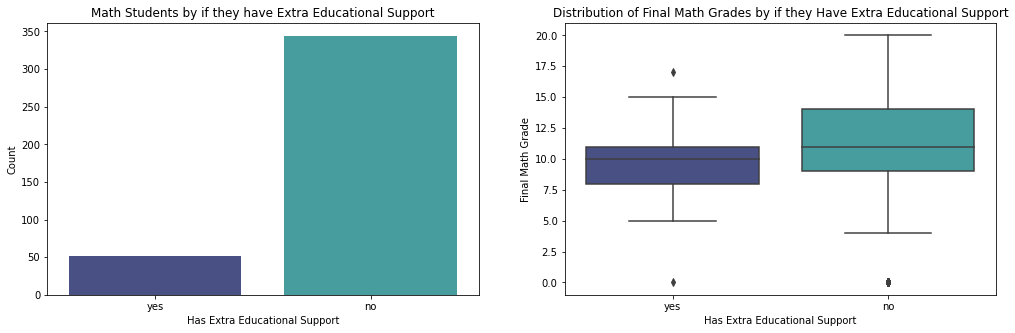

In [59]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='schoolsup', data=df_math, palette='mako')
ax.set_xlabel('Has Extra Educational Support')
ax.set_ylabel('Count')
ax.set_title('Math Students by if they have Extra Educational Support')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='schoolsup', y='G3', data=df_math, palette='mako')
ax2.set_xlabel('Has Extra Educational Support')
ax2.set_ylabel('Final Math Grade')
ax2.set_title('Distribution of Final Math Grades by if they Have Extra Educational Support')

Students who have extra educational support receive lower grades.  This support could be due to many factors we are not aware of - learning disabilities, health, behavioural issues. 

Text(0.5, 1.0, 'Distribution of Final Portuguese Grades by if they Have Extra Educational Support')

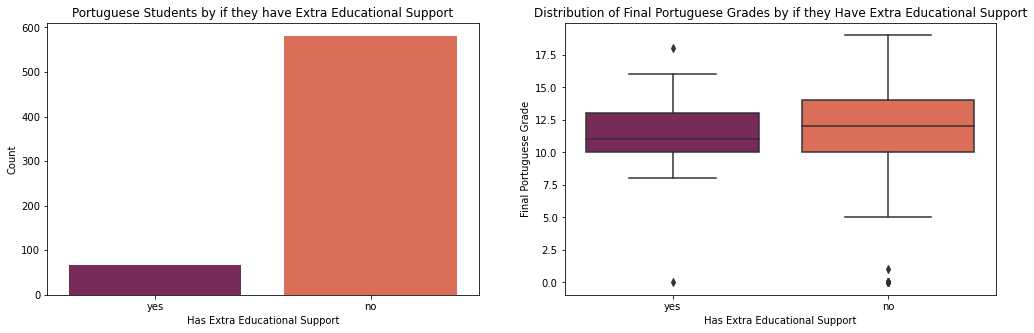

In [60]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='schoolsup', data=df_por, palette='rocket')
ax.set_xlabel('Has Extra Educational Support')
ax.set_ylabel('Count')
ax.set_title('Portuguese Students by if they have Extra Educational Support')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='schoolsup', y='G3', data=df_por, palette='rocket')
ax2.set_xlabel('Has Extra Educational Support')
ax2.set_ylabel('Final Portuguese Grade')
ax2.set_title('Distribution of Final Portuguese Grades by if they Have Extra Educational Support')

The same is true with the Portuguese students, however the difference in grades is less pronounced than it is with the math grades.

### Final Grades by if the Student has Internet Access at Home

I would expect that the number of students who have internet access at home in Portugal would be increasing, especially considering the previous data that showed that the rural population in the country has been decreasing for many years.

Text(0, 0.5, 'Percentage of Population')

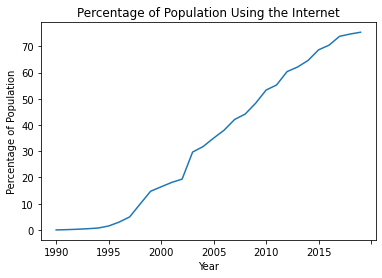

In [61]:
a = demographics_df.iloc[505]
a = a.drop('Indicator Name')
a = a.dropna()
ax = a.plot(title='Percentage of Population Using the Internet')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Population')

We can see that this is the case.  In 2017 about 75% of the Portuguese population had internet access at home.  Just as a comparison, in Canada in 2017 92.7% of the population had internet access at home (Source data.worldbank.org).

Text(0.5, 1.0, 'Distribution of Final Math Grades by if they Have Internet at Home')

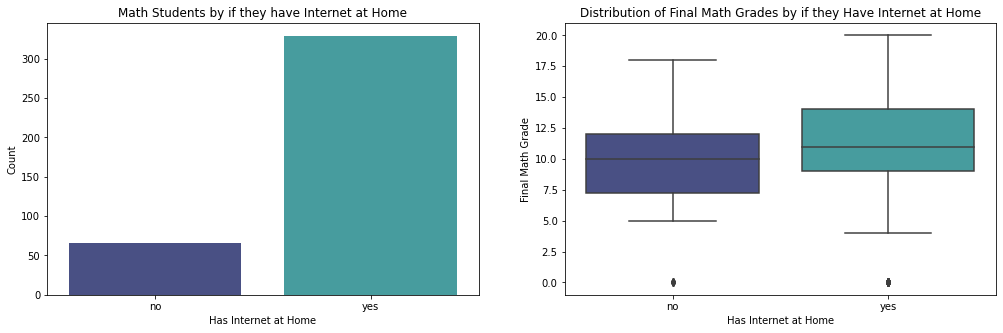

In [62]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='internet', data=df_math, palette='mako')
ax.set_xlabel('Has Internet at Home')
ax.set_ylabel('Count')
ax.set_title('Math Students by if they have Internet at Home')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='internet', y='G3', data=df_math, palette='mako')
ax2.set_xlabel('Has Internet at Home')
ax2.set_ylabel('Final Math Grade')
ax2.set_title('Distribution of Final Math Grades by if they Have Internet at Home')

Quite a few students do not have internet access at home, and these students receive lower math grades.  This is an interesting variable to consider.  While the internet offers many educational tools, it also offers many ways in which a student can be distracted from their studies.  A lack of internet at home would also probably indicate either a rural home address or a lack of financial resources of the family, both of which may make it more difficult for a student to succeed in school.

Text(0.5, 1.0, 'Distribution of Final Portuguese Grades by if they Have Internet at Home')

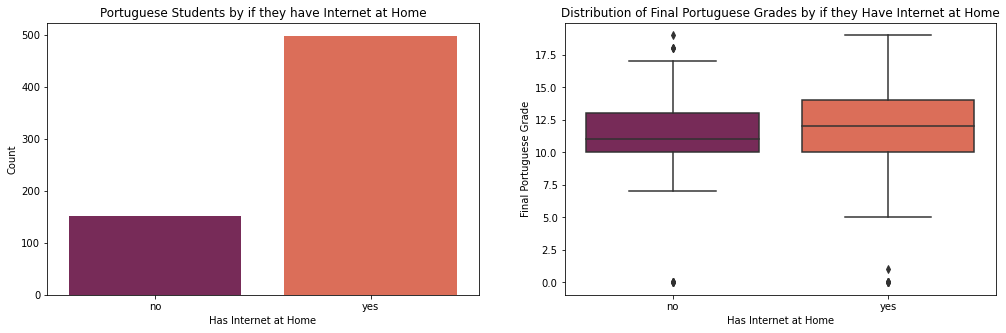

In [63]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='internet', data=df_por, palette='rocket')
ax.set_xlabel('Has Internet at Home')
ax.set_ylabel('Count')
ax.set_title('Portuguese Students by if they have Internet at Home')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='internet', y='G3', data=df_por, palette='rocket')
ax2.set_xlabel('Has Internet at Home')
ax2.set_ylabel('Final Portuguese Grade')
ax2.set_title('Distribution of Final Portuguese Grades by if they Have Internet at Home')

Again, a lot of students do not have internet access at home.  This is surprising to me as a Canadian.  

### Final Grades by Alcohol Consumption

In [64]:
# Weekday Alcohol Consumption
df_math['Dalc2'] = df_math['Dalc'].map({1: 'Very Low', 2: 'Low', 3: 'Moderate', 4: 'High', 5: 'Very High'})

Text(0.5, 1.0, 'Distribution of Final Math Grades by Weekday Alcohol Consumption')

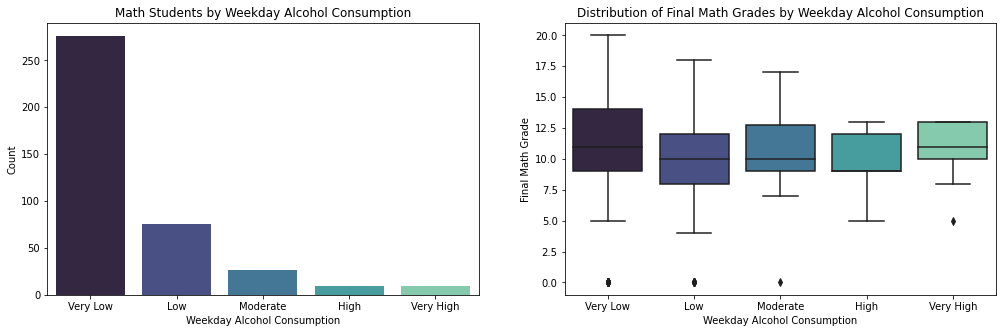

In [65]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='Dalc2', data=df_math, palette='mako', order=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
ax.set_xlabel('Weekday Alcohol Consumption')
ax.set_ylabel('Count')
ax.set_title('Math Students by Weekday Alcohol Consumption')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='Dalc2', y='G3', data=df_math, palette='mako', order=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
ax2.set_xlabel('Weekday Alcohol Consumption')
ax2.set_ylabel('Final Math Grade')
ax2.set_title('Distribution of Final Math Grades by Weekday Alcohol Consumption')

The vast majority of students characterize their weekday alcohol consumption as very low.  What is surprising is that students who drink alcohol more during the week do not experience a significant decrease in their math grades.  In fact, students who drink a moderate amount during the week actually get better math grades than those who drink a low amount.  I would have assumed this variable would have a strong correlation with math grades, but it does not.

In [66]:
df_por['Dalc2'] = df_por['Dalc'].map({1: 'Very Low', 2: 'Low', 3: 'Moderate', 4: 'High', 5: 'Very High'})

Text(0.5, 1.0, 'Distribution of Final Portuguese Grades by Weekday Alcohol Consumption')

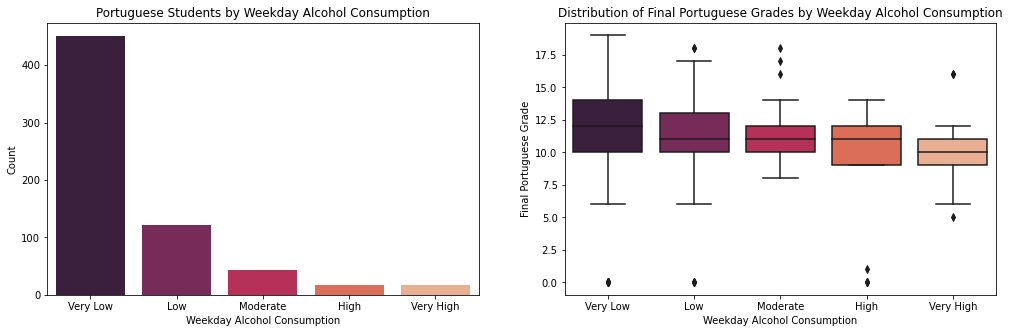

In [67]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='Dalc2', data=df_por, palette='rocket', order=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
ax.set_xlabel('Weekday Alcohol Consumption')
ax.set_ylabel('Count')
ax.set_title('Portuguese Students by Weekday Alcohol Consumption')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='Dalc2', y='G3', data=df_por, palette='rocket', order=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
ax2.set_xlabel('Weekday Alcohol Consumption')
ax2.set_ylabel('Final Portuguese Grade')
ax2.set_title('Distribution of Final Portuguese Grades by Weekday Alcohol Consumption')

As with math, the vast majority of students drink very little alcohol during the week.  With the Portugeuse grades we do see a decrease as the amount of alcohol consumption rises, but it is not as significant a decrease as I would have expected.

In [68]:
# Weekend Alcohol Consumption
df_math['Walc2'] = df_math['Walc'].map({1: 'Very Low', 2: 'Low', 3: 'Moderate', 4: 'High', 5: 'Very High'})

Text(0.5, 1.0, 'Distribution of Final Math Grades by Weekend Alcohol Consumption')

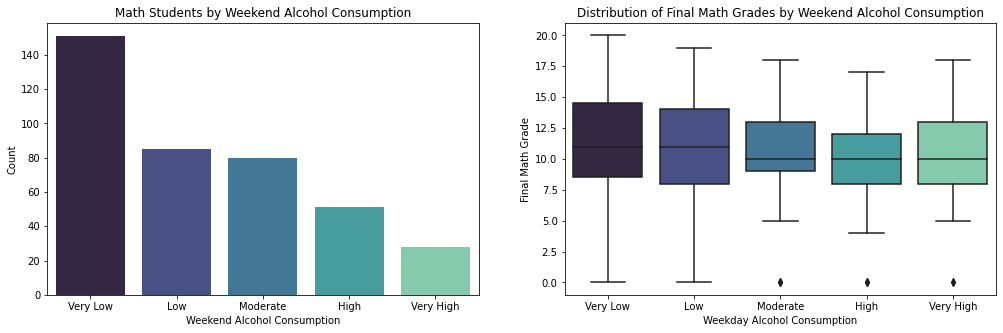

In [69]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='Walc2', data=df_math, palette='mako', order=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
ax.set_xlabel('Weekend Alcohol Consumption')
ax.set_ylabel('Count')
ax.set_title('Math Students by Weekend Alcohol Consumption')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='Walc2', y='G3', data=df_math, palette='mako', order=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
ax2.set_xlabel('Weekday Alcohol Consumption')
ax2.set_ylabel('Final Math Grade')
ax2.set_title('Distribution of Final Math Grades by Weekend Alcohol Consumption')

Many more math students consume alcohol on the weekends than during the week.  As the amount increases, there is a slight overall decrease in final math grades, but as before it is not very pronounced.

In [70]:
df_por['Walc2'] = df_por['Walc'].map({1: 'Very Low', 2: 'Low', 3: 'Moderate', 4: 'High', 5: 'Very High'})

Text(0.5, 1.0, 'Distribution of Final Portuguese Grades by Weekend Alcohol Consumption')

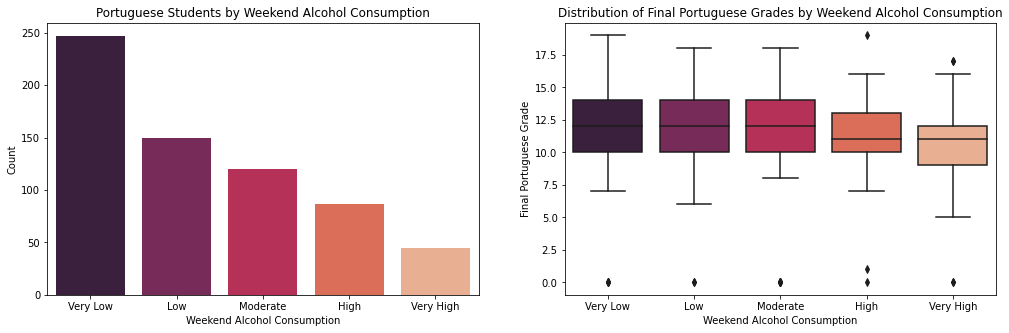

In [71]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='Walc2', data=df_por, palette='rocket', order=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
ax.set_xlabel('Weekend Alcohol Consumption')
ax.set_ylabel('Count')
ax.set_title('Portuguese Students by Weekend Alcohol Consumption')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='Walc2', y='G3', data=df_por, palette='rocket', order=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
ax2.set_xlabel('Weekend Alcohol Consumption')
ax2.set_ylabel('Final Portuguese Grade')
ax2.set_title('Distribution of Final Portuguese Grades by Weekend Alcohol Consumption')

The Portuguese students show the same results; more consume alcohol on weekends than during the week, and those who do experience a slight decrease in their grades.

### Final Grades by Health

We can explore a couple of health related statistics for the Portuguese population.

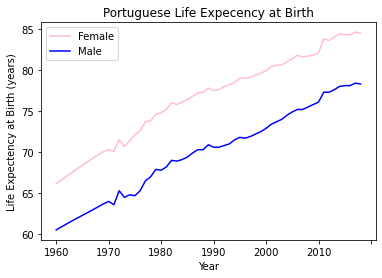

In [72]:
a = demographics_df.iloc[349]
a = a.drop('Indicator Name')
a = a.dropna()
ax = a.plot(color='pink', label='Female')
b = demographics_df.iloc[405]
b = b.drop('Indicator Name')
b = b.dropna()
ax2 = b.plot(color='blue', label='Male')

plt.xlabel('Year')
plt.ylabel('Life Expectency at Birth (years)')
plt.title('Portuguese Life Expecency at Birth')
plt.legend()
plt.show()

Both male and female life expenctency has been increasing steady in Portugal, with women living a few years longer than men, on average.

Text(0, 0.5, 'Physians (per 1,000 People)')

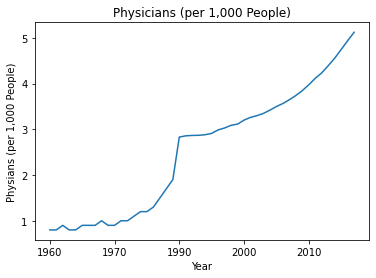

In [73]:
a = demographics_df.iloc[29]
a = a.drop('Indicator Name')
a = a.dropna()
ax = a.plot(title='Physicians (per 1,000 People)')
ax.set_xlabel('Year')
ax.set_ylabel('Physians (per 1,000 People)')

We can also see that the number of physians per 1,000 people in Portugal has been steadily rising.  These two factors would combine to suggest that the population is generally in better health than in the past.  We can now look at the health of these students, and how the state of their health impacts on their success in school.

In [74]:
df_math['health2'] = df_math['health'].map({1: 'Very Bad', 2: 'Bad', 3: 'Okay', 4: 'Good', 5: 'Very Good'})

Text(0.5, 1.0, 'Distribution of Final Math Grades by Current Health')

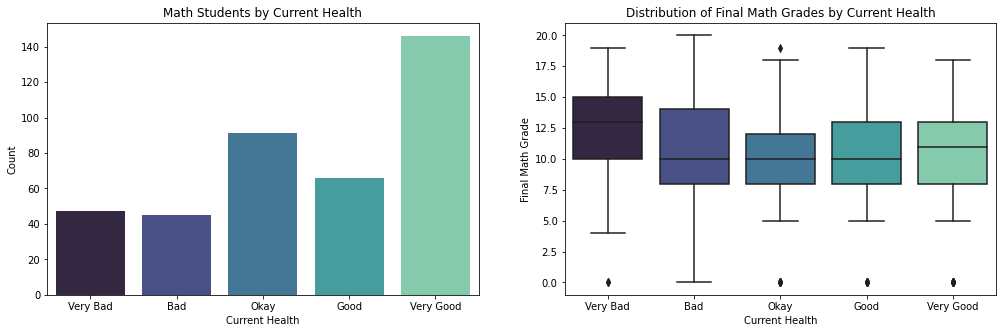

In [75]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='health2', data=df_math, palette='mako', order=['Very Bad', 'Bad', 'Okay', 'Good', 'Very Good'])
ax.set_xlabel('Current Health')
ax.set_ylabel('Count')
ax.set_title('Math Students by Current Health')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='health2', y='G3', data=df_math, palette='mako', order=['Very Bad', 'Bad', 'Okay', 'Good', 'Very Good'])
ax2.set_xlabel('Current Health')
ax2.set_ylabel('Final Math Grade')
ax2.set_title('Distribution of Final Math Grades by Current Health')

Now this is surprising - students with very bad health acheive the highest final math grades. 

In [76]:
df_por['health2'] = df_por['health'].map({1: 'Very Bad', 2: 'Bad', 3: 'Okay', 4: 'Good', 5: 'Very Good'})

Text(0.5, 1.0, 'Distribution of Final Portugeuse Grades by Current Health')

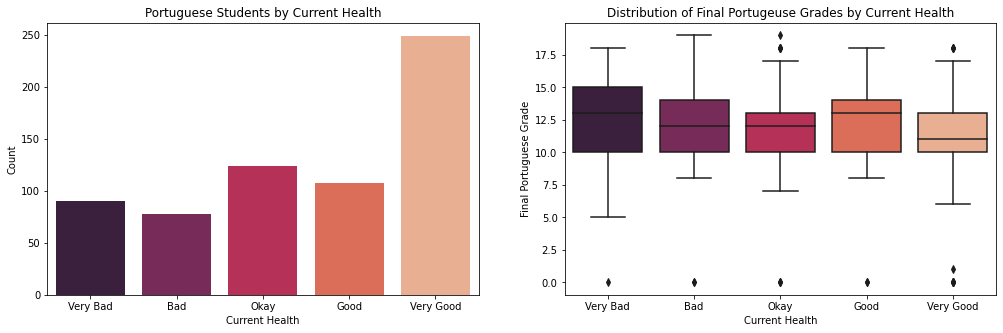

In [77]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
ax=sns.countplot(x='health2', data=df_por, palette='rocket', order=['Very Bad', 'Bad', 'Okay', 'Good', 'Very Good'])
ax.set_xlabel('Current Health')
ax.set_ylabel('Count')
ax.set_title('Portuguese Students by Current Health')

ax2=f.add_subplot(122)
ax2 = sns.boxplot(x='health2', y='G3', data=df_por, palette='rocket', order=['Very Bad', 'Bad', 'Okay', 'Good', 'Very Good'])
ax2.set_xlabel('Current Health')
ax2.set_ylabel('Final Portuguese Grade')
ax2.set_title('Distribution of Final Portugeuse Grades by Current Health')

And again the same is seen for the Portugeuse students - the students with very bad health have the highest median grade.

### A Look at Travel Time

In [78]:
df_math['traveltime2'] = df_math['traveltime'].map({1: "Under 15 mins", 2: "15 to 30 mins", 3: "30 to 60 mins", 4: "Over an hour"})
df_por['traveltime2'] = df_por['traveltime'].map({1: "Under 15 mins", 2: "15 to 30 mins", 3: "30 to 60 mins", 4: "Over an hour"})

Text(0, 0.5, 'Final Portuguese Grade')

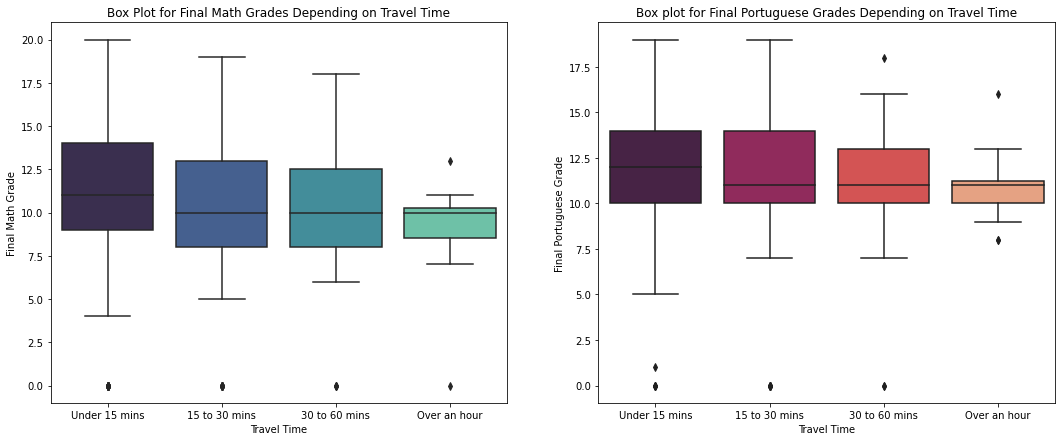

In [79]:
fig = plt.figure(figsize=(18,7))
ax= fig.add_subplot(121)
ax = sns.boxplot(x="traveltime2", y="G3", data = df_math, palette='mako', 
            order=['Under 15 mins', '15 to 30 mins', '30 to 60 mins', 'Over an hour'])
ax.set_title("Box Plot for Final Math Grades Depending on Travel Time")
ax.set_xlabel('Travel Time')
ax.set_ylabel('Final Math Grade')

ax2 = fig.add_subplot(122)
ax2 = sns.boxplot(x="traveltime2", y="G3", data = df_por, palette='rocket',
           order=['Under 15 mins', '15 to 30 mins', '30 to 60 mins', 'Over an hour'])
ax2.set_title("Box plot for Final Portuguese Grades Depending on Travel Time")
ax2.set_xlabel('Travel Time')
ax2.set_ylabel('Final Portuguese Grade')

For both subjects we see a strong relationship here - the longer a student must travel to school, the lower his or her final grades are.  We can now explore some features that relate to this travel time.

Text(0, 0.5, 'Density')

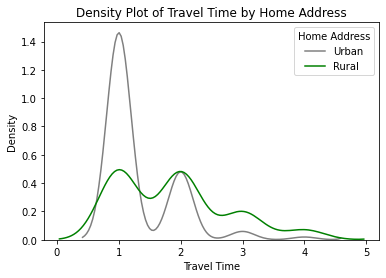

In [80]:
# Plot Travel Time Against Home Address
fig, ax = plt.subplots()
sns.distplot(df_math[df_math['address']=='U']['traveltime'], hist = False, label = 'Urban', ax=ax, color='grey')
sns.distplot(df_math[df_math['address']=='R']['traveltime'], hist = False, label = 'Rural', ax=ax, color='green')
plt.legend(title = 'Home Address')
plt.title('Density Plot of Travel Time by Home Address')
plt.xlabel('Travel Time')
plt.ylabel('Density')

As would be expected, students who live in rural areas must travel longer to get to school than students who live in urban areas.  

Text(0, 0.5, 'Number of Absences')

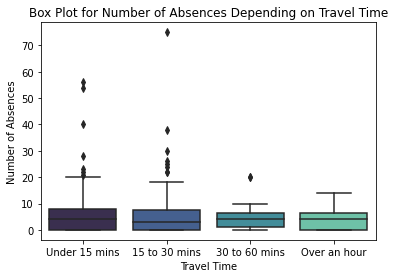

In [81]:
# Plotting number of absences based on travel time
ax = sns.boxplot(x="traveltime2", y="absences", data = df_math, palette='mako', 
            order=['Under 15 mins', '15 to 30 mins', '30 to 60 mins', 'Over an hour'])
ax.set_title("Box Plot for Number of Absences Depending on Travel Time")
ax.set_xlabel('Travel Time')
ax.set_ylabel('Number of Absences')

But here we see that the travel time does not seem to impact on the number of absences.  Students who know they must travel over an hour to get to school do not miss school more often than those students who live closer to school.

### A Look at Absences

The number of days of a school a student misses is something that I would assume would be a good predictor of the grades the student achieves.  First, let's plot the distribution of the absences of the Math and Portugeuse students to see the range of the data.

Text(0, 0.5, 'Density')

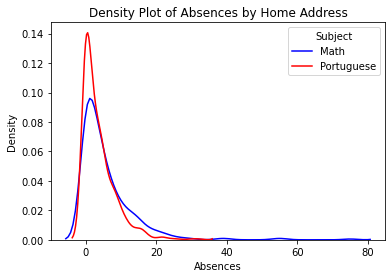

In [82]:
fig, ax = plt.subplots()
sns.distplot(df_math['absences'], hist = False, label = 'Math', ax=ax, color='blue')
sns.distplot(df_por['absences'], hist = False, label = 'Portuguese', ax=ax, color='red')
plt.legend(title = 'Subject')
plt.title('Density Plot of Absences by Home Address')
plt.xlabel('Absences')
plt.ylabel('Density')

Both distributions are normally distributed with right skew.  Both distributions seem to be centred just above zero.  We see that more Portuguese students miss less class than math students, and some math students miss a great number of classes. 

In [83]:
# Get the highest number of absences for a math student 
df_math['absences'].max()

75

In [84]:
# Divide the range 0 to 75 into 6 equal segments.  This will allow us to make a box plot to represent the data
df_math['absences2']= pd.cut(df_math['absences'], 6, labels=['0 to 12', '13 to 25', '25 to 37', '38 to 50', '50 to 62', '63 to 75'])

Text(0.5, 1.0, 'Distribution of Final Math Grades by Absences')

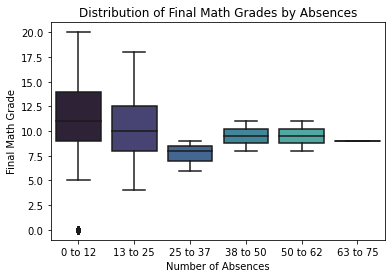

In [85]:
ax = sns.boxplot(x='absences2', y='G3', data=df_math, palette='mako')
ax.set_xlabel('Number of Absences')
ax.set_ylabel('Final Math Grade')
ax.set_title('Distribution of Final Math Grades by Absences')

Not surprisingly, the students that miss the least amount of class do the best in terms of final math grades.

In [86]:
# Get the highest number of absences for a Portuguese student 
df_por['absences'].max()

32

In [87]:
# Divide the range 0 to 75 into 6 equal segments.  This will allow us to make a box plot to represent the data
df_por['absences2']= pd.cut(df_por['absences'], 6, labels=['0 to 5', '6 to 10', '11 to 15', '16 to 21', '21 to 26', '27 to 32'])

Text(0.5, 1.0, 'Distribution of Final Portuguese Grades by Absences')

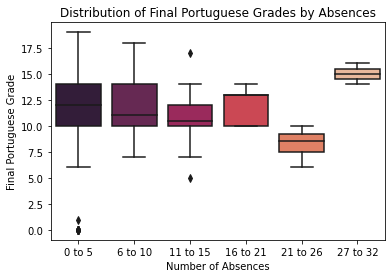

In [88]:
ax = sns.boxplot(x='absences2', y='G3', data=df_por, palette='rocket')
ax.set_xlabel('Number of Absences')
ax.set_ylabel('Final Portuguese Grade')
ax.set_title('Distribution of Final Portuguese Grades by Absences')

We see that grades remain pretty consistent here.  There is a dip in grades for 21 to 26 absences, but then a big boost for 27 to 32 absences.  These are clearly outliers as can be seen in the next line of code - these two classes represent a total of 6 out of the 649 total students.

In [89]:
df_por['absences2'].value_counts()

0 to 5      478
6 to 10     122
11 to 15     38
16 to 21      5
21 to 26      4
27 to 32      2
Name: absences2, dtype: int64

We can look now at how some of the other variables correlate with the number of absences.  We will explore these trends using the Math student dataset.

Text(0, 0.5, 'Absences')

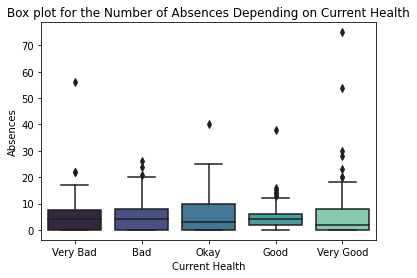

In [90]:
ax = sns.boxplot(x="health2", y="absences", data = df_math , palette = 'mako', order=['Very Bad', 'Bad', 'Okay', 'Good', 'Very Good'])
ax.set_title("Box plot for the Number of Absences Depending on Current Health")
ax.set_xlabel('Current Health')
ax.set_ylabel('Absences')

This gives us no indication that students with poor help miss more classes.

Text(0, 0.5, 'Density')

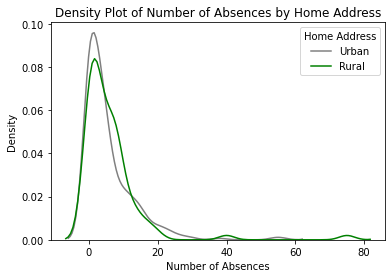

In [91]:
fig, ax = plt.subplots()
sns.distplot(df_math[df_math['address']=='U']['absences'], hist = False, label = 'Urban', ax=ax, color='grey')
sns.distplot(df_math[df_math['address']=='R']['absences'], hist = False, label = 'Rural', ax=ax, color='green')
plt.legend(title = 'Home Address')
plt.title('Density Plot of Number of Absences by Home Address')
plt.xlabel('Number of Absences')
plt.ylabel('Density')

From this plot we see that students who live in rural areas miss more classes than those who live in urban areas, but the difference is not particularly large.

Text(0.5, 1.0, 'Box plot for the Number of Absences Depending on Age')

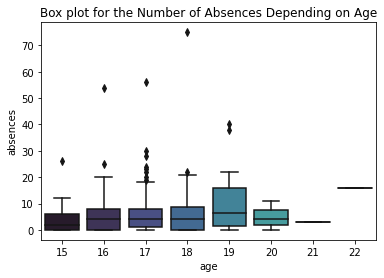

In [92]:
ax = sns.boxplot(x="age", y="absences", data = df_math , palette = 'mako')
ax.set_title("Box plot for the Number of Absences Depending on Age")

We see there is an increase in the number of absences as the students get older.

Text(0, 0.5, 'Density')

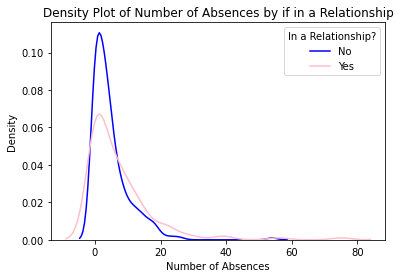

In [93]:
fig, ax = plt.subplots()
sns.distplot(df_math[df_math['romantic']=='no']['absences'], hist = False, label = 'No', ax=ax, color='blue')
sns.distplot(df_math[df_math['romantic']=='yes']['absences'], hist = False, label = 'Yes', ax=ax, color='pink')
plt.legend(title = 'In a Relationship?')
plt.title('Density Plot of Number of Absences by if in a Relationship')
plt.xlabel('Number of Absences')
plt.ylabel('Density')

We see that students who are not in romantic relationships miss fewer classes than those who are.  We can use this information now and see whether or not if a person is in a romantic relationship or not has an impact of their final math grades.  

Text(0.5, 1.0, 'Distribution of Final Math Grades by if they are in a Romantic Relationship')

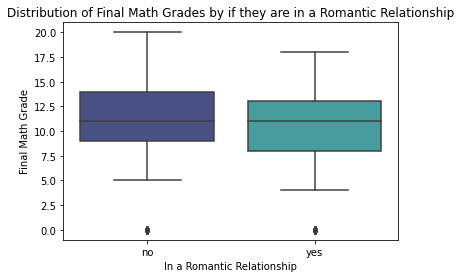

In [94]:
ax = sns.boxplot(x='romantic', y='G3', data=df_math, palette='mako')
ax.set_xlabel('In a Romantic Relationship')
ax.set_ylabel('Final Math Grade')
ax.set_title('Distribution of Final Math Grades by if they are in a Romantic Relationship')

Although these students who are not in relationships miss fewer classes, they final grades are only slightly better than those who are.  

### A Look at Study Time

Of all the many factors we have in our datasets, one I would assume would have a very strong relationship with a student's academic performance would be the amount of time he or she spends studying.

In [95]:
df_math['studytime2'] = df_math['studytime'].map({1: 'Under 2 hours', 2:'2 to 5 hours', 3: '5 to 10 hours', 4: 'Over 10 hours'})
df_por['studytime2'] = df_por['studytime'].map({1: 'Under 2 hours', 2:'2 to 5 hours', 3: '5 to 10 hours', 4: 'Over 10 hours'})

Text(0.5, 1.0, 'Final Portuguese Grades Depending on Weekly Study Time')

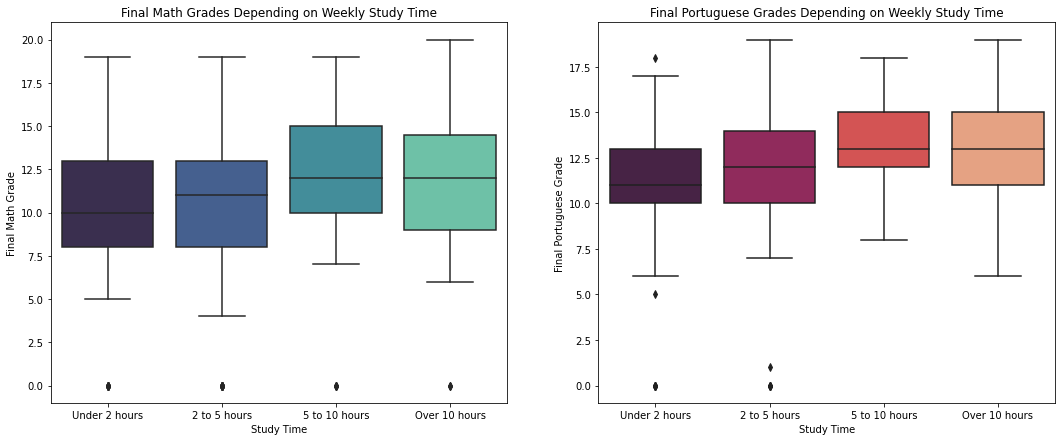

In [96]:
fig = plt.figure(figsize=(18,7))
ax= fig.add_subplot(121)
ax = sns.boxplot(x="studytime2", y="G3", data = df_math, palette='mako', 
                order=['Under 2 hours', '2 to 5 hours', '5 to 10 hours', 'Over 10 hours'])
ax.set_xlabel('Study Time')
ax.set_ylabel('Final Math Grade')
ax.set_title("Final Math Grades Depending on Weekly Study Time")

fx2 = fig.add_subplot(122)
ax = sns.boxplot(x="studytime2", y="G3", data = df_por, palette='rocket', 
                order=['Under 2 hours', '2 to 5 hours', '5 to 10 hours', 'Over 10 hours'])
ax.set_xlabel('Study Time')
ax.set_ylabel('Final Portuguese Grade')
ax.set_title("Final Portuguese Grades Depending on Weekly Study Time")

As would be expected there is a clear relationship between study times and grades for both subjects - the more a student studies, the better final grade they can expect to achieve.  Next we will consider how different factors relate to how much time a student spends studying.  For these visualizations we will use the Portuguese student data.

Text(0, 0.5, 'Density')

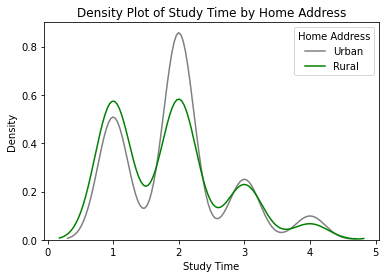

In [97]:
fig, ax = plt.subplots()
sns.distplot(df_por[df_por['address']=='U']['studytime'], hist = False, label = 'Urban', ax=ax, color='grey')
sns.distplot(df_por[df_por['address']=='R']['studytime'], hist = False, label = 'Rural', ax=ax, color='green')
plt.legend(title = 'Home Address')
plt.title('Density Plot of Study Time by Home Address')
plt.xlabel('Study Time')
plt.ylabel('Density')

Study time is pretty consistent between students who live in urban areas versus rural areas.

Text(0, 0.5, 'Density')

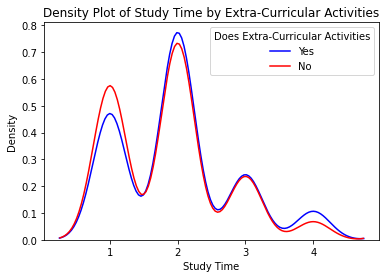

In [98]:
fig, ax = plt.subplots()
sns.distplot(df_por[df_por['activities']=='yes']['studytime'], hist = False, label = 'Yes', ax=ax, color='blue')
sns.distplot(df_por[df_por['activities']=='no']['studytime'], hist = False, label = 'No', ax=ax, color='red')
plt.legend(title = 'Does Extra-Curricular Activities')
plt.title('Density Plot of Study Time by Extra-Curricular Activities')
plt.xlabel('Study Time')
plt.ylabel('Density')

Extra-curricular activities also does not impact on study time.

Text(0, 0.5, 'Density')

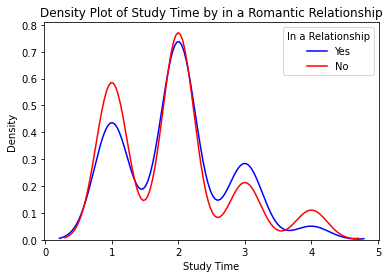

In [99]:
fig, ax = plt.subplots()
sns.distplot(df_por[df_por['romantic']=='yes']['studytime'], hist = False, label = 'Yes', ax=ax, color='blue')
sns.distplot(df_por[df_por['romantic']=='no']['studytime'], hist = False, label = 'No', ax=ax, color='red')
plt.legend(title = 'In a Relationship')
plt.title('Density Plot of Study Time by in a Romantic Relationship')
plt.xlabel('Study Time')
plt.ylabel('Density')

Being in a relationship also does not have much impact on study time, however students that are not in relationships are more likely to be among those who study over 10 hours a week than those students who are in relationships.

In [100]:
df_math['goout2'] = df_math['goout'].map({1: 'Very Low', 2: 'Low', 3: 'Moderate', 4: 'High', 5: 'Very High'})

Text(0, 0.5, 'Weekly Study Time')

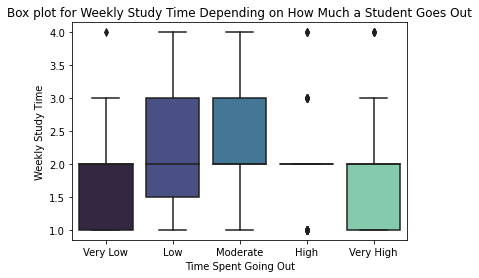

In [101]:
ax = sns.boxplot(x="goout2", y="studytime", data = df_math , palette = 'mako',
                order=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
ax.set_title("Box plot for Weekly Study Time Depending on How Much a Student Goes Out")
ax.set_xlabel('Time Spent Going Out')
ax.set_ylabel('Weekly Study Time')

Not surprisingly, students that spend a very high amount of time going out study less than others.  But students that go out very infrequently also do not study as much as others.

Text(0, 0.5, 'Weekly Study Time')

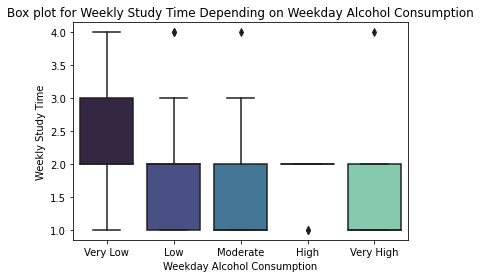

In [102]:
ax = sns.boxplot(x="Dalc2", y="studytime", data = df_math, palette = 'mako',
                order=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
ax.set_title("Box plot for Weekly Study Time Depending on Weekday Alcohol Consumption")
ax.set_xlabel('Weekday Alcohol Consumption')
ax.set_ylabel('Weekly Study Time')

Students whose weekday alcohol consumption is very low study more than students who drink more alcohol during the week.

Text(0, 0.5, 'Density')

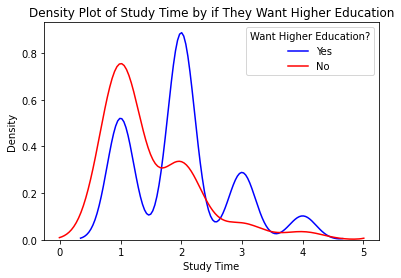

In [103]:
fig, ax = plt.subplots()
sns.distplot(df_por[df_por['higher']=='yes']['studytime'], hist = False, label = 'Yes', ax=ax, color='blue')
sns.distplot(df_por[df_por['higher']=='no']['studytime'], hist = False, label = 'No', ax=ax, color='red')
plt.legend(title = 'Want Higher Education?')
plt.title('Density Plot of Study Time by if They Want Higher Education')
plt.xlabel('Study Time')
plt.ylabel('Density')

As would be expected, students who desire higher education focus more on their studies and spend more time studying than those who do not.

### Conclusions:

This analysis has looked at the relationship between many of the variables and a student's final grades, as well as the relationships between some of these variables.  The next stage will be modelling this data.  As we have determined here, some of the factors that most impact on a student's final grade are:

- the student's previous grades 
- their previous number of failed courses
- their parents' education 
- internet access
- travel time to and from school 
- study time 
- the desire to pursue further education.

We have explored how some of the other variables relate to these and other factors.  For example, there is a strong link between the desire to pursue further education and the amount of time a student spends studying.

Similarly, we have identified several factors that might have been assumed to have a great correlation with a student's final grades but do not.  These include their current health and the number of times they are absent from school.